In [1]:
#import funtions:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [2]:
#Importing and Loading the datasets:
singa1 = pd.read_csv('C:/Users/jenis/Desktop/New folder/singapore data/ResaleFlatPricesBasedonApprovalDate19901999.csv')
singa2 = pd.read_csv('C:/Users/jenis/Desktop/New folder/singapore data/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
singa3 = pd.read_csv('C:/Users/jenis/Desktop/New folder/singapore data/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
singa4 = pd.read_csv('C:/Users/jenis/Desktop/New folder/singapore data/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
singa5 = pd.read_csv('C:/Users/jenis/Desktop/New folder/singapore data/ResaleFlatPricesBasedonRegistrationDateFromJan2017onwards.csv')

In [3]:
singa = pd.concat([singa1,singa2,singa3,singa4,singa5],axis=0)

In [4]:
singa

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180957,2024-06,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,543000.0,89 years 10 months
180958,2024-06,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,528888.0,61 years 07 months
180959,2024-06,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,590000.0,63 years 07 months
180960,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months


In [5]:
singa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927165 entries, 0 to 180961
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927165 non-null  object 
 1   town                 927165 non-null  object 
 2   flat_type            927165 non-null  object 
 3   block                927165 non-null  object 
 4   street_name          927165 non-null  object 
 5   storey_range         927165 non-null  object 
 6   floor_area_sqm       927165 non-null  float64
 7   flat_model           927165 non-null  object 
 8   lease_commence_date  927165 non-null  int64  
 9   resale_price         927165 non-null  float64
 10  remaining_lease      218115 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.9+ MB


In [6]:
#checking dataset shape
singa.shape

(927165, 11)

In [7]:
# verify the no of unique values in each features
for i in list(singa.columns):
    print(f"{i}:{singa[i].nunique()}")

month:414
town:27
flat_type:8
block:2711
street_name:584
storey_range:25
floor_area_sqm:212
flat_model:34
lease_commence_date:56
resale_price:9518
remaining_lease:726


In [8]:
#checking the datatypes
singa.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [9]:
# checking the null values in dataset
singa.isnull().sum() 

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
# droping remaining_lease missing values
singa = singa.dropna()
singa.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [11]:
singa

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
180957,2024-06,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,543000.0,89 years 10 months
180958,2024-06,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,528888.0,61 years 07 months
180959,2024-06,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,590000.0,63 years 07 months
180960,2024-06,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months


In [12]:
#descriptive statistics analaysis:
singa.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,218115.0,97.132402,24.052831,31.0,81.0,94.0,112.0,280.0
lease_commence_date,218115.0,1995.144126,13.684768,1966.0,1985.0,1995.0,2005.0,2022.0
resale_price,218115.0,487295.550186,168369.775960,140000.0,365000.0,455000.0,580000.0,1568888.0


In [13]:
#checking the unique values in flat_type feature
singa['flat_type'].value_counts()

flat_type
4 ROOM              91521
5 ROOM              53729
3 ROOM              52858
EXECUTIVE           16288
2 ROOM               3554
MULTI-GENERATION       83
1 ROOM                 82
Name: count, dtype: int64

In [14]:
#checking the unique values in town feature
singa['town'].value_counts()

town
SENGKANG           17596
WOODLANDS          15425
PUNGGOL            14978
JURONG WEST        14866
TAMPINES           14776
YISHUN             14555
BEDOK              12065
HOUGANG            11037
CHOA CHU KANG      10046
ANG MO KIO          9305
BUKIT BATOK         8424
BUKIT MERAH         8318
BUKIT PANJANG       8054
TOA PAYOH           6746
KALLANG/WHAMPOA     6576
PASIR RIS           6571
QUEENSTOWN          5968
SEMBAWANG           5965
GEYLANG             5450
CLEMENTI            4996
JURONG EAST         4553
SERANGOON           4130
BISHAN              3962
CENTRAL AREA        1868
MARINE PARADE       1343
BUKIT TIMAH          542
Name: count, dtype: int64

In [15]:
#checking the unique values in storey_range feature
singa['storey_range'].value_counts()

storey_range
04 TO 06    50596
07 TO 09    46239
10 TO 12    40813
01 TO 03    38960
13 TO 15    20509
16 TO 18     9432
19 TO 21     4008
22 TO 24     2853
25 TO 27     1690
28 TO 30     1098
31 TO 33      576
34 TO 36      525
37 TO 39      459
40 TO 42      223
43 TO 45       65
46 TO 48       52
49 TO 51       17
Name: count, dtype: int64

In [16]:
#checking the unique values in flat-model feature
singa['flat_model'].value_counts()

flat_model
Model A                   74197
Improved                  54063
New Generation            28805
Premium Apartment         23965
Simplified                 8827
Apartment                  8168
Maisonette                 6170
Standard                   6134
DBSS                       3234
Model A2                   2651
Type S1                     435
Model A-Maisonette          394
Adjoined flat               367
Type S2                     217
Terrace                     122
Premium Apartment Loft      108
2-room                       97
Multi Generation             83
3Gen                         32
Improved-Maisonette          30
Premium Maisonette           16
Name: count, dtype: int64

In [17]:
singa.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [18]:
# Convert the 'month' column to a datetime format
singa['month'] = pd.to_datetime(singa['month'])

In [19]:
# Extract the year and month into separate columns
singa['year'] = singa['month'].dt.year
singa['month_of_year'] = singa['month'].dt.month

In [20]:
singa

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,2024-06-01,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,543000.0,89 years 10 months,2024,6
180958,2024-06-01,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,528888.0,61 years 07 months,2024,6
180959,2024-06-01,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,590000.0,63 years 07 months,2024,6
180960,2024-06-01,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months,2024,6


In [21]:
singa.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
year                            int32
month_of_year                   int32
dtype: object

In [22]:
#Extract the year of lease commencement
#object to datetime:
singa['lease_commence_year'] = pd.to_datetime(singa['lease_commence_date'],format = '%Y').dt.year


In [23]:
singa

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,1986
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,1981
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,1980
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,1979
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,2024-06-01,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,543000.0,89 years 10 months,2024,6,2015
180958,2024-06-01,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,528888.0,61 years 07 months,2024,6,1986
180959,2024-06-01,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,590000.0,63 years 07 months,2024,6,1988
180960,2024-06-01,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months,2024,6,2018


In [24]:
singa.dtypes 

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
year                            int32
month_of_year                   int32
lease_commence_year             int32
dtype: object

In [25]:
#Extract the remaining_lease feature
house = singa['remaining_lease']
singa_new = pd.DataFrame(house)

In [26]:
house

0                         70
1                         65
2                         64
3                         63
4                         64
                 ...        
180957    89 years 10 months
180958    61 years 07 months
180959    63 years 07 months
180960    92 years 11 months
180961    92 years 08 months
Name: remaining_lease, Length: 218115, dtype: object

In [27]:
singa_new

,remaining_lease
0,70
1,65
2,64
3,63
4,64
...,...
180957,89 years 10 months
180958,61 years 07 months
180959,63 years 07 months
180960,92 years 11 months


In [28]:
#Extract years and months using regular expressions
lease_detail = singa['remaining_lease'].str.extract(r'(\d+) years (\d+) months')
lease_detail.columns = ['years', 'months']

In [29]:
lease_detail

,years,months
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
180957,89,10
180958,61,07
180959,63,07
180960,92,11


In [30]:
# Convert to numeric values
singa['remaining_lease_years'] = pd.to_numeric(lease_detail['years'])
singa['remaining_lease_months'] = pd.to_numeric(lease_detail['months'])

In [31]:
singa_data = singa.copy()

In [32]:
singa_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70,2015,1,1986,NaN,NaN
1,2015-01-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65,2015,1,1981,NaN,NaN
2,2015-01-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64,2015,1,1980,NaN,NaN
3,2015-01-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63,2015,1,1979,NaN,NaN
4,2015-01-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64,2015,1,1980,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,2024-06-01,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,2015,543000.0,89 years 10 months,2024,6,2015,89.0,10.0
180958,2024-06-01,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,1986,528888.0,61 years 07 months,2024,6,1986,61.0,7.0
180959,2024-06-01,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,1988,590000.0,63 years 07 months,2024,6,1988,63.0,7.0
180960,2024-06-01,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,2018,700000.0,92 years 11 months,2024,6,2018,92.0,11.0


In [33]:
singa_data.isnull().sum()

month                         0
town                          0
flat_type                     0
block                         0
street_name                   0
storey_range                  0
floor_area_sqm                0
flat_model                    0
lease_commence_date           0
resale_price                  0
remaining_lease               0
year                          0
month_of_year                 0
lease_commence_year           0
remaining_lease_years     66739
remaining_lease_months    66739
dtype: int64

In [34]:
#handleing the null values using mean method
singa_data['remaining_lease_years'].fillna(singa['remaining_lease_years'].mean(),inplace = True)
singa_data['remaining_lease_months'].fillna(singa['remaining_lease_months'].mean(),inplace = True)

In [35]:
singa_data.isnull().sum()

month                     0
town                      0
flat_type                 0
block                     0
street_name               0
storey_range              0
floor_area_sqm            0
flat_model                0
lease_commence_date       0
resale_price              0
remaining_lease           0
year                      0
month_of_year             0
lease_commence_year       0
remaining_lease_years     0
remaining_lease_months    0
dtype: int64

In [36]:
# dropping the existing features 
singa_data.drop(columns=['month','lease_commence_date','remaining_lease'],inplace = True)

In [37]:
singa_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,255000.0,2015,1,1986,74.03747,6.533559
1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,275000.0,2015,1,1981,74.03747,6.533559
2,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,285000.0,2015,1,1980,74.03747,6.533559
3,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,290000.0,2015,1,1979,74.03747,6.533559
4,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,290000.0,2015,1,1980,74.03747,6.533559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,YISHUN,4 ROOM,426C,YISHUN AVE 11,10 TO 12,92.0,Model A,543000.0,2024,6,2015,89.00000,10.000000
180958,YISHUN,4 ROOM,758,YISHUN ST 72,10 TO 12,84.0,Simplified,528888.0,2024,6,1986,61.00000,7.000000
180959,YISHUN,4 ROOM,844,YISHUN ST 81,10 TO 12,104.0,Model A,590000.0,2024,6,1988,63.00000,7.000000
180960,YISHUN,5 ROOM,509A,YISHUN AVE 4,04 TO 06,113.0,Improved,700000.0,2024,6,2018,92.00000,11.000000


In [38]:
#Finding unique value:
singa_data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [39]:
singa_data['town'].value_counts()

town
SENGKANG           17596
WOODLANDS          15425
PUNGGOL            14978
JURONG WEST        14866
TAMPINES           14776
YISHUN             14555
BEDOK              12065
HOUGANG            11037
CHOA CHU KANG      10046
ANG MO KIO          9305
BUKIT BATOK         8424
BUKIT MERAH         8318
BUKIT PANJANG       8054
TOA PAYOH           6746
KALLANG/WHAMPOA     6576
PASIR RIS           6571
QUEENSTOWN          5968
SEMBAWANG           5965
GEYLANG             5450
CLEMENTI            4996
JURONG EAST         4553
SERANGOON           4130
BISHAN              3962
CENTRAL AREA        1868
MARINE PARADE       1343
BUKIT TIMAH          542
Name: count, dtype: int64

In [40]:
singa_data['flat_type'].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [41]:
singa_data['flat_type'].value_counts()

flat_type
4 ROOM              91521
5 ROOM              53729
3 ROOM              52858
EXECUTIVE           16288
2 ROOM               3554
MULTI-GENERATION       83
1 ROOM                 82
Name: count, dtype: int64

In [42]:
singa_data['storey_range'].unique()

array(['07 TO 09', '01 TO 03', '13 TO 15', '10 TO 12', '04 TO 06',
       '19 TO 21', '16 TO 18', '22 TO 24', '25 TO 27', '28 TO 30',
       '34 TO 36', '46 TO 48', '31 TO 33', '37 TO 39', '43 TO 45',
       '40 TO 42', '49 TO 51'], dtype=object)

In [43]:
singa_data['storey_range'].value_counts()

storey_range
04 TO 06    50596
07 TO 09    46239
10 TO 12    40813
01 TO 03    38960
13 TO 15    20509
16 TO 18     9432
19 TO 21     4008
22 TO 24     2853
25 TO 27     1690
28 TO 30     1098
31 TO 33      576
34 TO 36      525
37 TO 39      459
40 TO 42      223
43 TO 45       65
46 TO 48       52
49 TO 51       17
Name: count, dtype: int64

In [44]:
singa_data['flat_model'].unique()


array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [45]:
singa_data['flat_model'].value_counts()

flat_model
Model A                   74197
Improved                  54063
New Generation            28805
Premium Apartment         23965
Simplified                 8827
Apartment                  8168
Maisonette                 6170
Standard                   6134
DBSS                       3234
Model A2                   2651
Type S1                     435
Model A-Maisonette          394
Adjoined flat               367
Type S2                     217
Terrace                     122
Premium Apartment Loft      108
2-room                       97
Multi Generation             83
3Gen                         32
Improved-Maisonette          30
Premium Maisonette           16
Name: count, dtype: int64

In [46]:
#Data preprocessing:
encoder = LabelEncoder()
singa_data['town'] = encoder.fit_transform(singa_data['town'])
singa_data['flat_type'] = encoder.fit_transform(singa_data['flat_type'])
singa_data['storey_range'] = encoder.fit_transform(singa_data['storey_range'])
singa_data['flat_model'] = encoder.fit_transform(singa_data['flat_model'])

In [47]:
singa_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,174,ANG MO KIO AVE 4,2,60.0,5,255000.0,2015,1,1986,74.03747,6.533559
1,0,2,541,ANG MO KIO AVE 10,0,68.0,12,275000.0,2015,1,1981,74.03747,6.533559
2,0,2,163,ANG MO KIO AVE 4,0,69.0,12,285000.0,2015,1,1980,74.03747,6.533559
3,0,2,446,ANG MO KIO AVE 10,0,68.0,12,290000.0,2015,1,1979,74.03747,6.533559
4,0,2,557,ANG MO KIO AVE 10,2,68.0,12,290000.0,2015,1,1980,74.03747,6.533559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,25,3,426C,YISHUN AVE 11,3,92.0,8,543000.0,2024,6,2015,89.00000,10.000000
180958,25,3,758,YISHUN ST 72,3,84.0,16,528888.0,2024,6,1986,61.00000,7.000000
180959,25,3,844,YISHUN ST 81,3,104.0,8,590000.0,2024,6,1988,63.00000,7.000000
180960,25,4,509A,YISHUN AVE 4,1,113.0,5,700000.0,2024,6,2018,92.00000,11.000000


In [48]:
#after encoding descriptive statistics analaysis
singa_data.describe().T

,count,mean,std,min,25%,50%,75%,max
town,218115.0,13.891521,7.955723,0.0,8.0,14.000000,21.0,25.0
flat_type,218115.0,3.120771,0.919120,0.0,2.0,3.000000,4.0,6.0
storey_range,218115.0,2.219169,1.947841,0.0,1.0,2.000000,3.0,16.0
floor_area_sqm,218115.0,97.132402,24.052831,31.0,81.0,94.000000,112.0,280.0
flat_model,218115.0,8.691305,3.646239,0.0,5.0,8.000000,12.0,20.0
resale_price,218115.0,487295.550186,168369.775960,140000.0,365000.0,455000.000000,580000.0,1568888.0
year,218115.0,2019.604819,2.683030,2015.0,2017.0,2020.000000,2022.0,2024.0
month_of_year,218115.0,6.497527,3.406422,1.0,4.0,7.000000,9.0,12.0
lease_commence_year,218115.0,1995.144126,13.684768,1966.0,1985.0,1995.000000,2005.0,2022.0
remaining_lease_years,218115.0,74.037470,11.600752,41.0,66.0,74.037470,80.0,97.0


In [49]:
#Skewness handling
#checking the outliers using boxplot & distribution plot

def plot(singa_data,column):
    plt.figure(figsize =(15,6))
    plt.subplot(1,3,1)
    sns.boxplot(data = singa_data ,x = column)
    plt.title(f'box plot for {column}')
    

    plt.subplot(1,3,2)
    sns.histplot(data =singa_data ,x = column,kde = True ,bins = 40)
    plt.title(f'distribution  plot for {column}')
    plt.show()

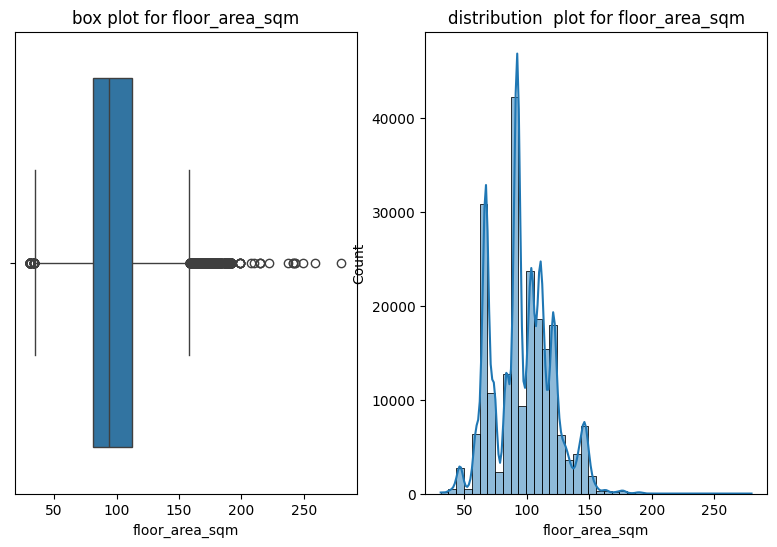

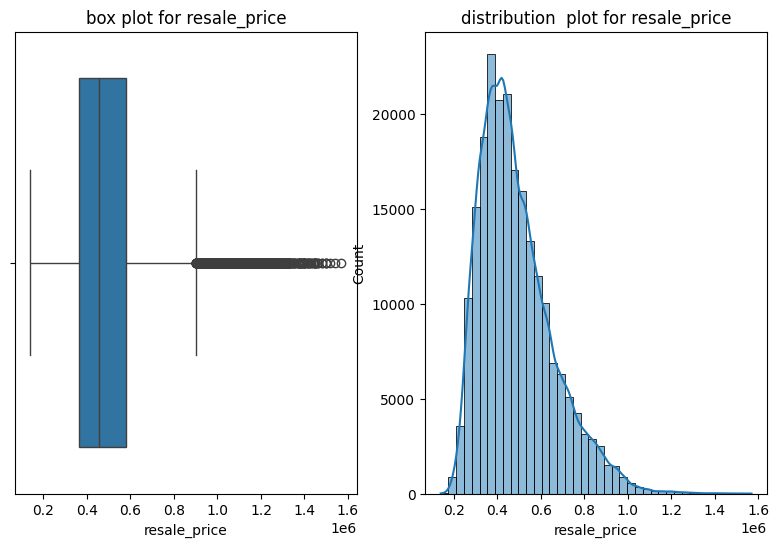

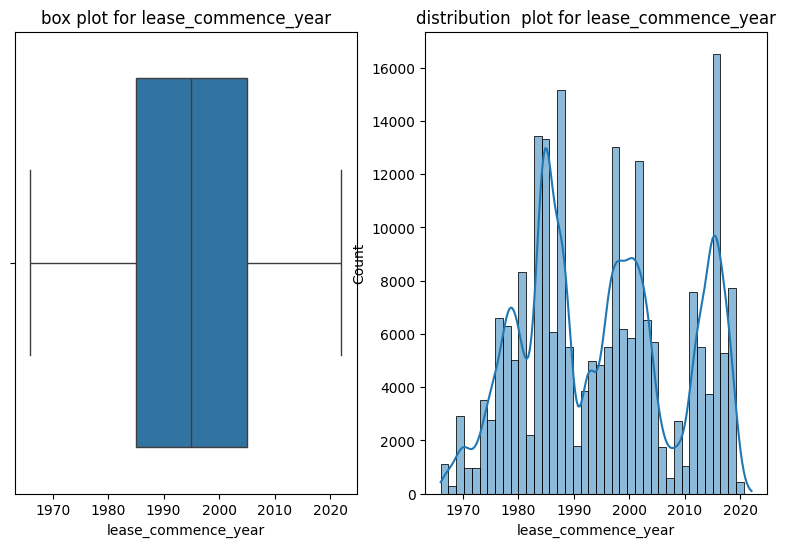

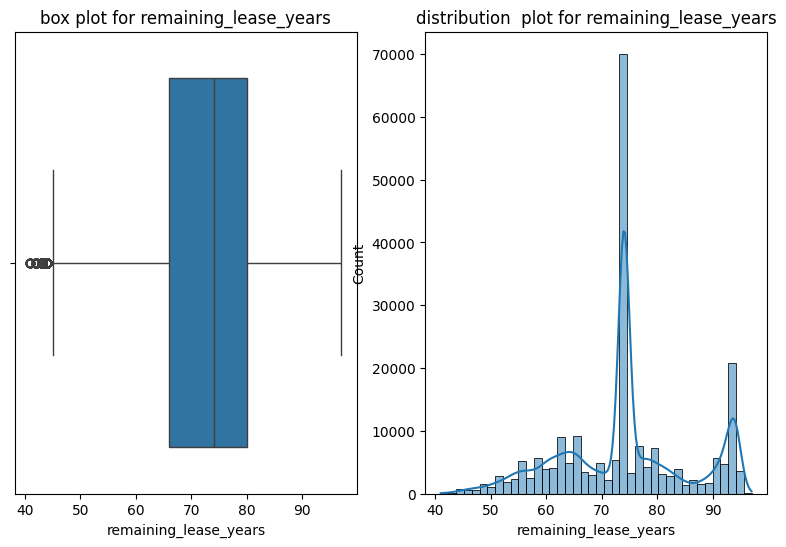

In [50]:
for i in ['floor_area_sqm','resale_price','lease_commence_year','remaining_lease_years']:
    plot(singa_data ,i)

In [51]:
#'floor_area_sqm','resale_price' feature are skewd.so using the log transformation method to handle the skewness data:
singa_data['floor_area_sqm'] = np.log(singa_data['floor_area_sqm'])
singa_data['resale_price'] = np.log(singa_data['resale_price'])

In [52]:
singa_data

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,174,ANG MO KIO AVE 4,2,4.094345,5,12.449019,2015,1,1986,74.03747,6.533559
1,0,2,541,ANG MO KIO AVE 10,0,4.219508,12,12.524526,2015,1,1981,74.03747,6.533559
2,0,2,163,ANG MO KIO AVE 4,0,4.234107,12,12.560244,2015,1,1980,74.03747,6.533559
3,0,2,446,ANG MO KIO AVE 10,0,4.219508,12,12.577636,2015,1,1979,74.03747,6.533559
4,0,2,557,ANG MO KIO AVE 10,2,4.219508,12,12.577636,2015,1,1980,74.03747,6.533559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,25,3,426C,YISHUN AVE 11,3,4.521789,8,13.204865,2024,6,2015,89.00000,10.000000
180958,25,3,758,YISHUN ST 72,3,4.430817,16,13.178532,2024,6,1986,61.00000,7.000000
180959,25,3,844,YISHUN ST 81,3,4.644391,8,13.287878,2024,6,1988,63.00000,7.000000
180960,25,4,509A,YISHUN AVE 4,1,4.727388,5,13.458836,2024,6,2018,92.00000,11.000000


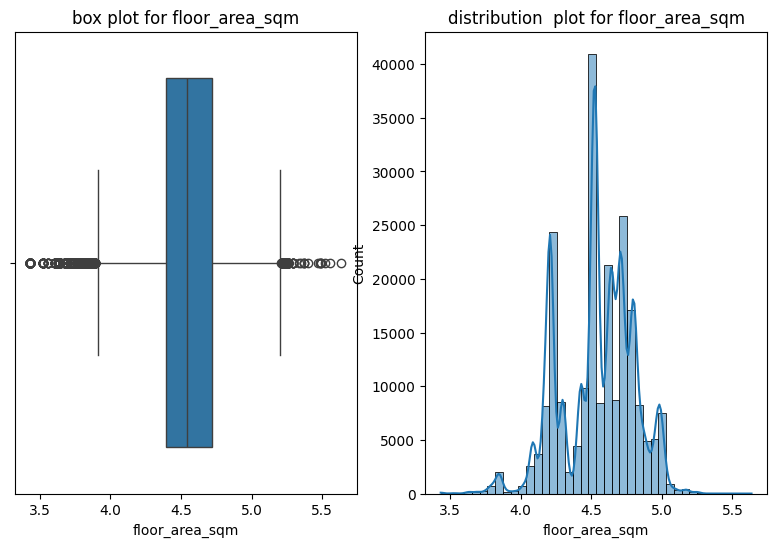

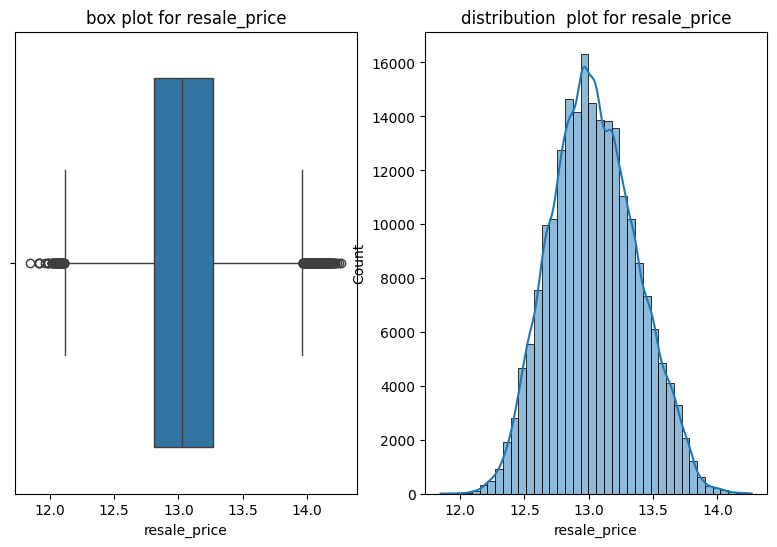

In [53]:
for i in ['floor_area_sqm','resale_price']:
    plot(singa_data,i)

In [54]:
#Treat Outliers using IQR:
#using the IQR & Clips  method removing the outliers :
# formula IQR = Q3_Q1
def outlier(singa_data ,column):
    IQR = singa_data[column].quantile(0.75)-singa_data[column].quantile(0.25)
    upper_value = singa_data[column].quantile(0.75)+1.5*IQR
    lower_value = singa_data[column].quantile(0.25)-1.5*IQR
    
    singa_data[column] =     singa_data[column].clip(upper_value,lower_value)

outlier(singa_data, 'floor_area_sqm')
outlier(singa_data, 'resale_price')
singa_data1 = singa_data.copy()

In [55]:
singa_data1

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,174,ANG MO KIO AVE 4,2,4.094345,5,12.449019,2015,1,1986,74.03747,6.533559
1,0,2,541,ANG MO KIO AVE 10,0,4.219508,12,12.524526,2015,1,1981,74.03747,6.533559
2,0,2,163,ANG MO KIO AVE 4,0,4.234107,12,12.560244,2015,1,1980,74.03747,6.533559
3,0,2,446,ANG MO KIO AVE 10,0,4.219508,12,12.577636,2015,1,1979,74.03747,6.533559
4,0,2,557,ANG MO KIO AVE 10,2,4.219508,12,12.577636,2015,1,1980,74.03747,6.533559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180957,25,3,426C,YISHUN AVE 11,3,4.521789,8,13.204865,2024,6,2015,89.00000,10.000000
180958,25,3,758,YISHUN ST 72,3,4.430817,16,13.178532,2024,6,1986,61.00000,7.000000
180959,25,3,844,YISHUN ST 81,3,4.644391,8,13.287878,2024,6,1988,63.00000,7.000000
180960,25,4,509A,YISHUN AVE 4,1,4.727388,5,13.458836,2024,6,2018,92.00000,11.000000


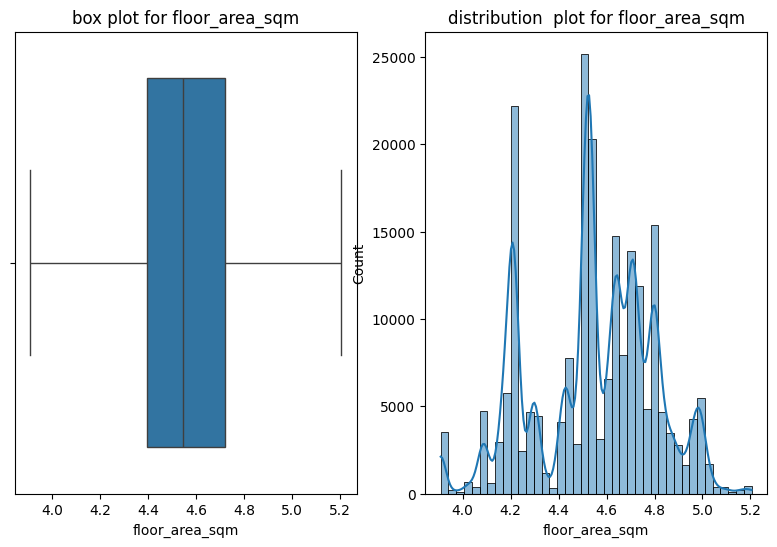

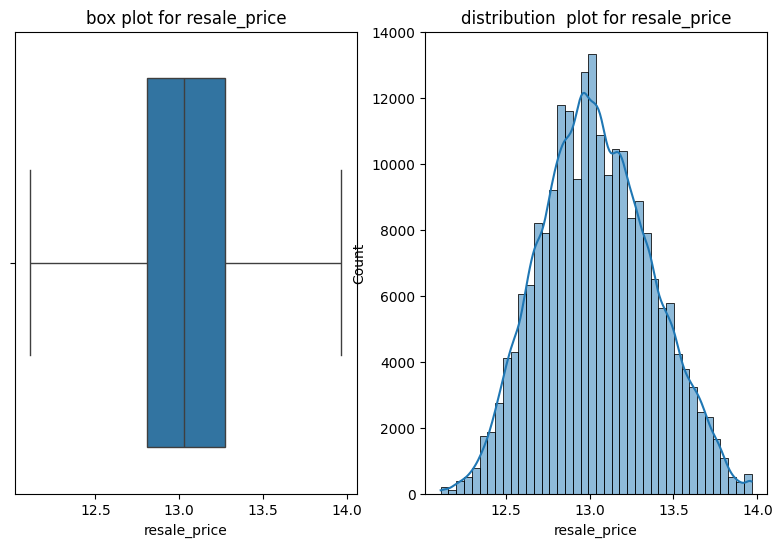

In [56]:
# after IQR using checking the skewness
for i in ['floor_area_sqm','resale_price']:
    plot(singa_data1,i)

<Axes: xlabel='resale_price', ylabel='flat_model'>

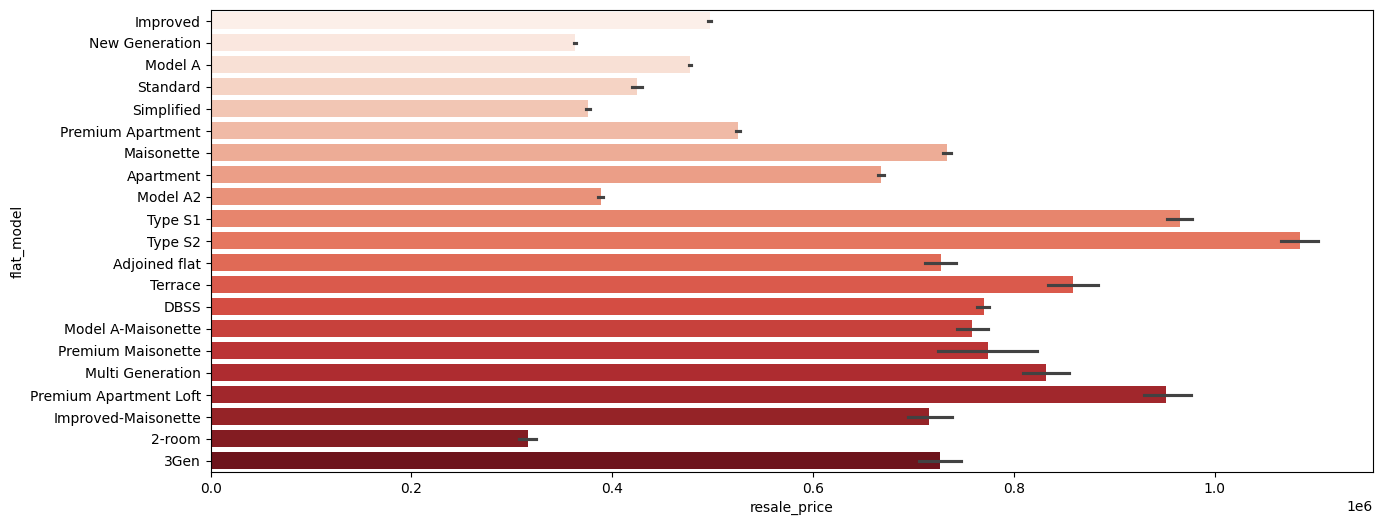

In [57]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_model', x= 'resale_price',data = singa, palette='Reds')

<Axes: xlabel='resale_price', ylabel='town'>

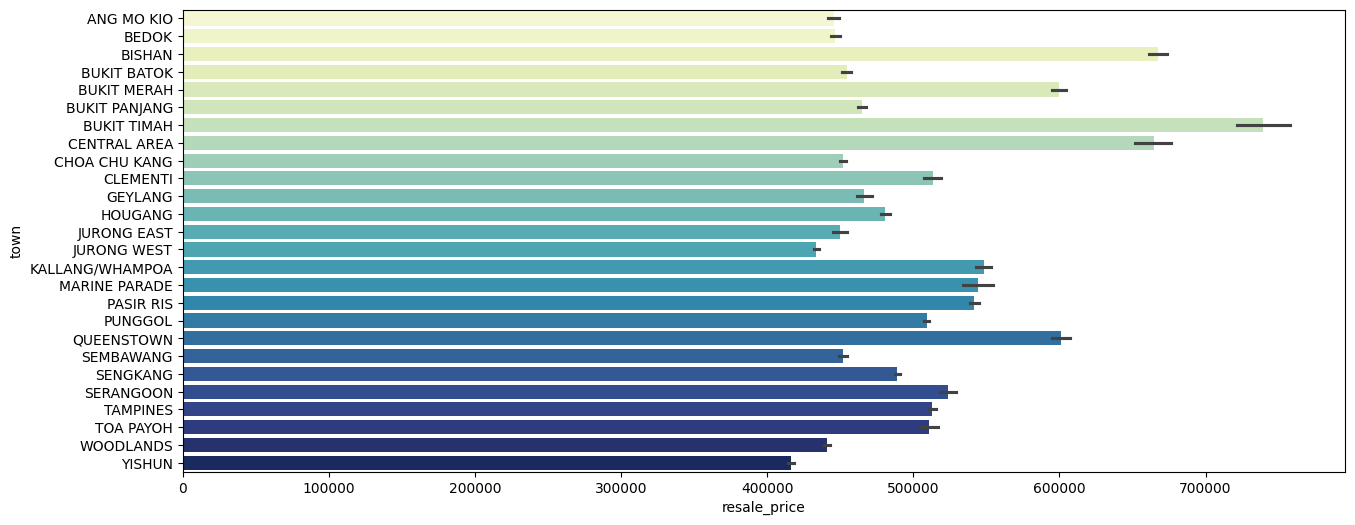

In [58]:
plt.figure(figsize= (15,6))
sns.barplot(y = 'town', x= 'resale_price',data = singa, palette='YlGnBu' )

<Axes: xlabel='resale_price', ylabel='flat_type'>

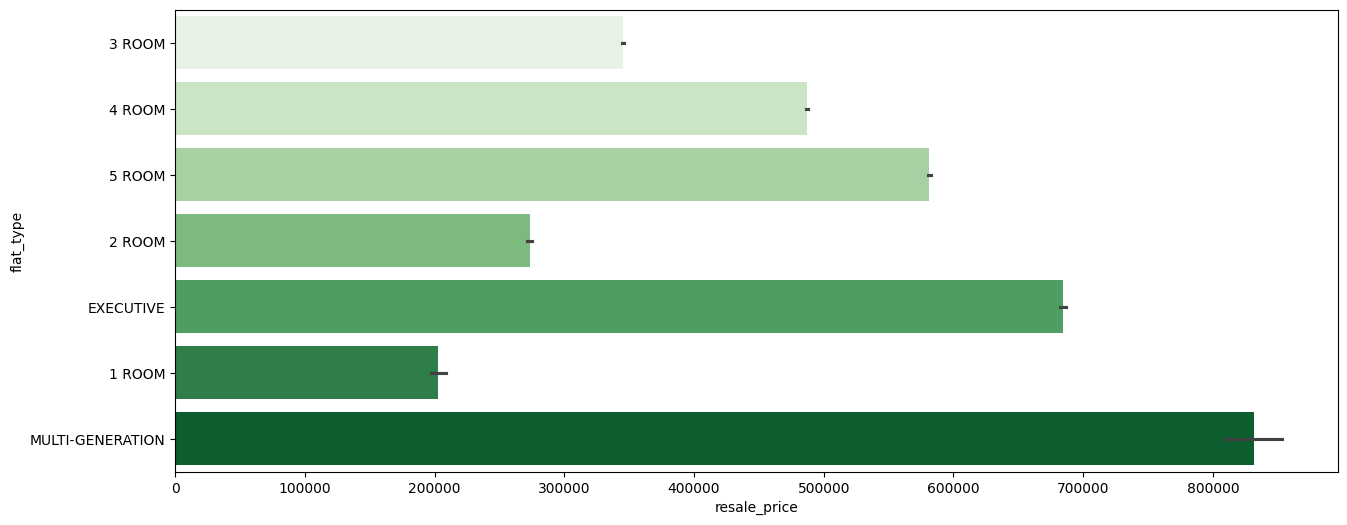

In [59]:
#Basic EXPLORATORY DATA ANALYSIS(EDA)
plt.figure(figsize= (15,6))
sns.barplot(y = 'flat_type', x= 'resale_price',data = singa, palette='Greens')

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

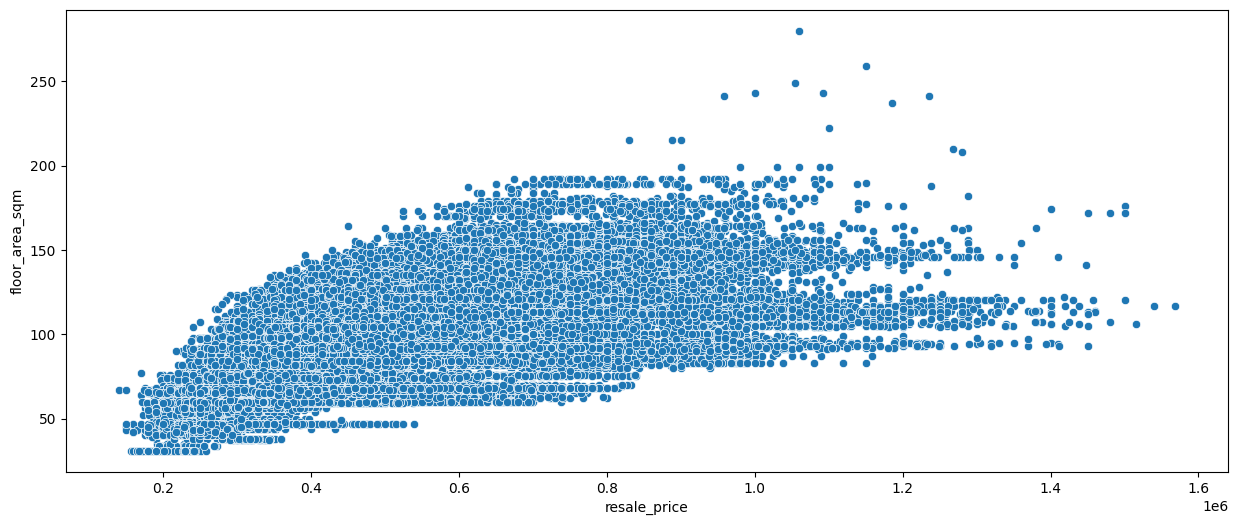

In [60]:
plt.figure(figsize=(15,6))
sns.scatterplot(x = 'resale_price' ,y = 'floor_area_sqm',data = singa )

<Axes: xlabel='lease_commence_year', ylabel='resale_price'>

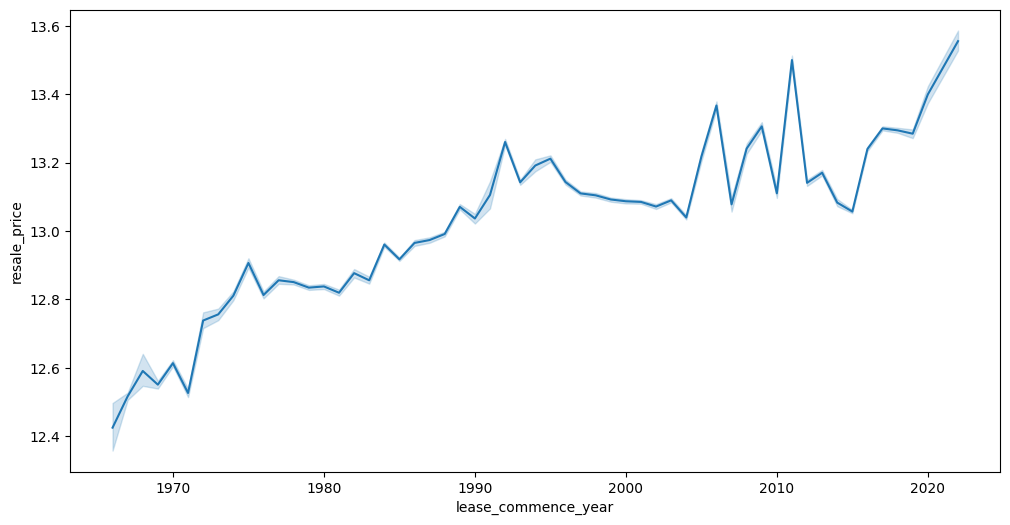

In [61]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'lease_commence_year' , y = 'resale_price', data = singa_data)

<Axes: xlabel='year', ylabel='resale_price'>

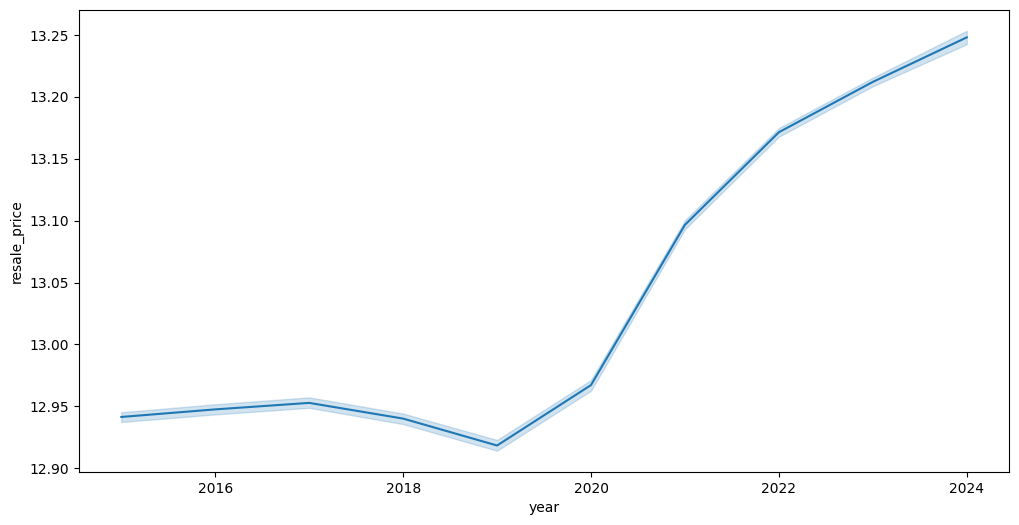

In [62]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'year', y = 'resale_price', data = singa_data)

<Axes: xlabel='remaining_lease_years', ylabel='resale_price'>

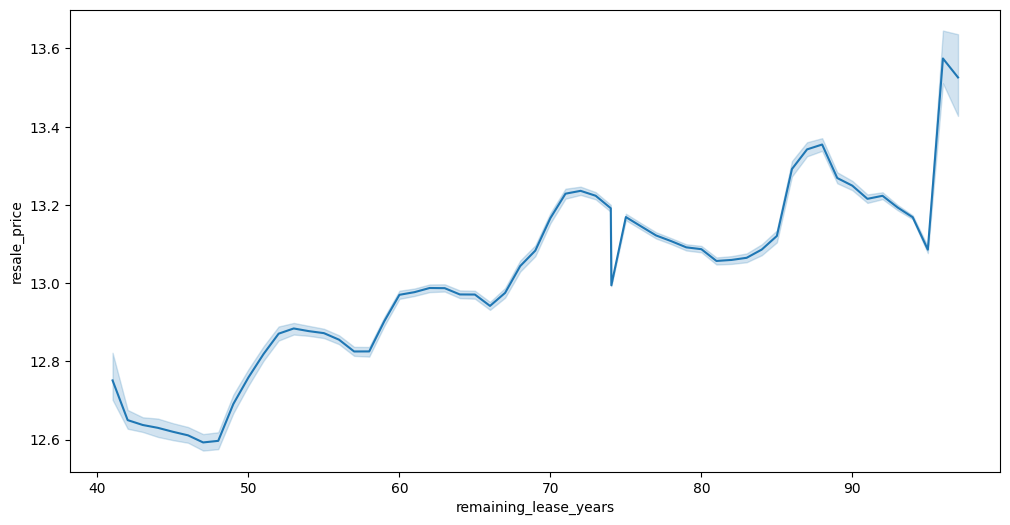

In [63]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'remaining_lease_years' , y = 'resale_price', data = singa_data)

In [64]:
# dropping the irrelvent feature 
singa_data1.drop(columns=['block','street_name'],inplace = True)

In [65]:
singa_data1

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
0,0,2,2,4.094345,5,12.449019,2015,1,1986,74.03747,6.533559
1,0,2,0,4.219508,12,12.524526,2015,1,1981,74.03747,6.533559
2,0,2,0,4.234107,12,12.560244,2015,1,1980,74.03747,6.533559
3,0,2,0,4.219508,12,12.577636,2015,1,1979,74.03747,6.533559
4,0,2,2,4.219508,12,12.577636,2015,1,1980,74.03747,6.533559
...,...,...,...,...,...,...,...,...,...,...,...
180957,25,3,3,4.521789,8,13.204865,2024,6,2015,89.00000,10.000000
180958,25,3,3,4.430817,16,13.178532,2024,6,1986,61.00000,7.000000
180959,25,3,3,4.644391,8,13.287878,2024,6,1988,63.00000,7.000000
180960,25,4,1,4.727388,5,13.458836,2024,6,2018,92.00000,11.000000


In [66]:
singa_data1.dtypes

town                        int32
flat_type                   int32
storey_range                int32
floor_area_sqm            float64
flat_model                  int32
resale_price              float64
year                        int32
month_of_year               int32
lease_commence_year         int32
remaining_lease_years     float64
remaining_lease_months    float64
dtype: object

In [67]:
#Heatmap for find the correlation between the data:
heat_map = singa_data1.corr()

In [68]:
heat_map

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,year,month_of_year,lease_commence_year,remaining_lease_years,remaining_lease_months
town,1.000000,0.110552,-0.052307,0.106503,-0.090675,-0.011649,0.026469,0.006218,0.217287,0.177675,0.004605
flat_type,0.110552,1.000000,0.039485,0.945194,-0.330038,0.659585,-0.011196,0.007101,0.214162,0.155255,-0.001614
storey_range,-0.052307,0.039485,1.000000,0.010954,-0.040303,0.330235,0.035841,-0.002158,0.274861,0.232608,-0.001460
floor_area_sqm,0.106503,0.945194,0.010954,1.000000,-0.328170,0.660236,-0.018755,0.004547,0.193607,0.136628,-0.002725
flat_model,-0.090675,-0.330038,-0.040303,-0.328170,1.000000,-0.247497,-0.030697,-0.004446,-0.128474,-0.103413,0.001398
resale_price,-0.011649,0.659585,0.330235,0.660236,-0.247497,1.000000,0.310166,-0.016326,0.417820,0.304634,0.004283
year,0.026469,-0.011196,0.035841,-0.018755,-0.030697,0.310166,1.000000,-0.112980,0.185650,-0.011522,0.004753
month_of_year,0.006218,0.007101,-0.002158,0.004547,-0.004446,-0.016326,-0.112980,1.000000,0.000527,-0.007094,0.015508
lease_commence_year,0.217287,0.214162,0.274861,0.193607,-0.128474,0.417820,0.185650,0.000527,1.000000,0.843005,0.014284
remaining_lease_years,0.177675,0.155255,0.232608,0.136628,-0.103413,0.304634,-0.011522,-0.007094,0.843005,1.000000,-0.002208


<Axes: >

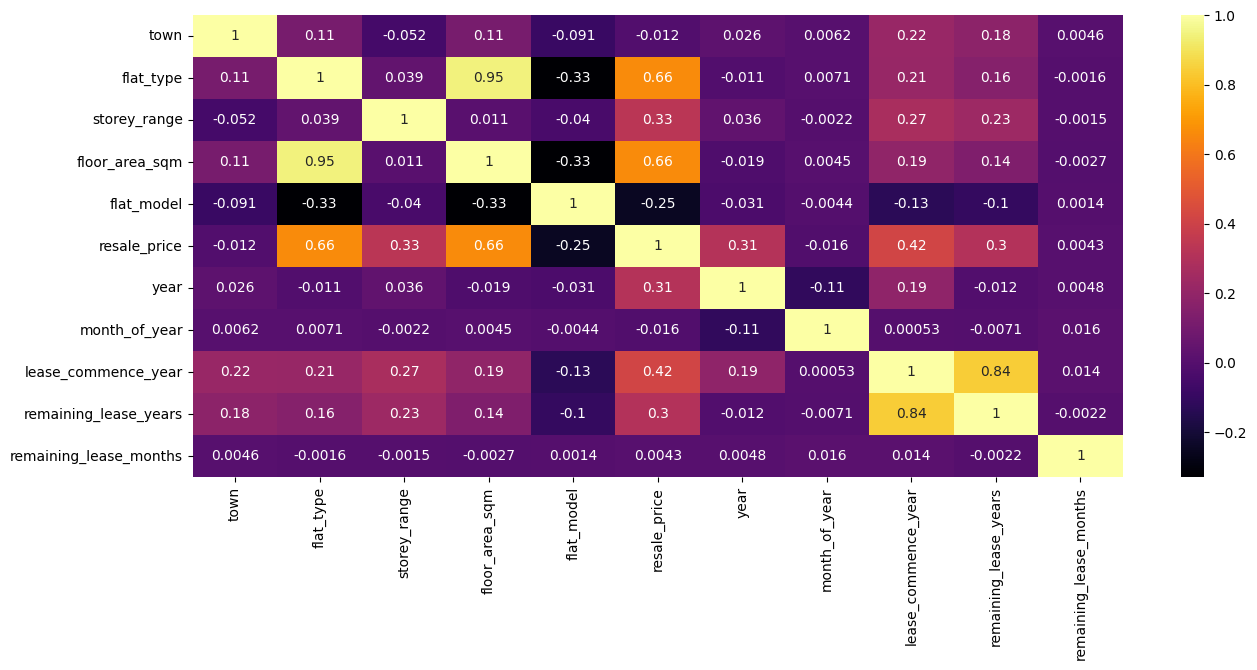

In [69]:
#need to verify any columns are highly correlated using Heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heat_map,annot = True, cmap="inferno")

In [70]:
singa_data1.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'year', 'month_of_year', 'lease_commence_year',
       'remaining_lease_years', 'remaining_lease_months'],
      dtype='object')

#### Model Building (RandomForestRegressor)

In [71]:
x = singa_data1[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model','year', 'month_of_year', 'lease_commence_year','remaining_lease_years', 'remaining_lease_months']]
y = singa_data1[['resale_price']]

In [72]:
#standardize the features of a dataset
encoder = StandardScaler()

encoder.fit_transform(x)

array([[-1.74610813, -1.21939883, -0.11251909, ..., -0.66819888,
         0.        ,  0.        ],
       [-1.74610813, -1.21939883, -1.13929937, ..., -1.03356944,
         0.        ,  0.        ],
       [-1.74610813, -1.21939883, -1.13929937, ..., -1.10664355,
         0.        ,  0.        ],
       ...,
       [ 1.39629108, -0.13139899,  0.40087104, ..., -0.52205065,
        -0.95144653,  0.1938631 ],
       [ 1.39629108,  0.95660084, -0.62590923, ...,  1.67017272,
         1.54839722,  1.85635008],
       [ 1.39629108,  0.95660084,  0.40087104, ...,  1.67017272,
         1.54839722,  0.60948484]])

In [73]:
#check the accuracy of training and testing using metrics RandomForestRegressor:
#Train-Test Split:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

rfr = RandomForestRegressor()
#specifying Hyperparameters:(specified hyperparameters: 50 estimators (trees) and a random state of 0.)
rfr= RandomForestRegressor(n_estimators= 50 ,random_state = 0)

# fitting the model using fit() method
rfr.fit(x_train,y_train)

#making predictions
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

#r2_score()method isused to find the higher values to indicate better model performance
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

In [74]:
r2_train,r2_test

(0.9927533255469104, 0.9541569652757921)

In [ ]:
# we got good accuracy after oversampling
# RandomForestRegressor have good testing accuracy, but in training accuracy is overfitting.

In [75]:
# GridsearchCV is a cross validation function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

param = {'max_depth': [20],
        'min_samples_split': [ 5, ],
        'min_samples_leaf' : [ 2, ],
        'max_features' : ['log2']}
grid_searchcv = GridSearchCV(RandomForestRegressor(),param_grid = param, cv = 5)
grid_searchcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'max_features': ['log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5]})

In [76]:
grid_searchcv.best_score_

0.9288178437478936

In [77]:
#hyperparameter tuning:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_train.shape,x_test.shape

rfr = RandomForestRegressor()

#specifying Hyperparameters:
Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)  
#log2  it consider the base-2 logarithm of the total number of features when deciding the maximum number of features to consider for each split.

# fitting the model using fit() method
Hyper_model.fit(x_train,y_train)

#making predictions:
y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

#evaluating performance:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

In [78]:
#r2_score()method isused to find the higher values to indicate better model performance
r2_train,r2_test

(0.955939424432221, 0.9298803154753352)

In [ ]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [79]:
# predict the selling price with hypertuning parameters and calculate the accuracy using metrics
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
x_train.shape,x_test.shape

rfr = RandomForestRegressor()
#specifying Hyperparameters:
Hyper_model= RandomForestRegressor(max_depth= 20 ,max_features='log2' ,min_samples_leaf=2, min_samples_split=5)

#fitting the model using fit() method
Hyper_model.fit(x_train, y_train)

#making predictions:
y_pred_train = Hyper_model.predict(x_train)
y_pred_test = Hyper_model.predict(x_test)

#evaluation metrics:
print('Mean Squared Error:' ,mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(r2_score(y_test, y_pred_test))

Mean Squared Error: 0.007684451564082393
Mean Absolute Error: 0.06362194649131091
Root Mean Squared Error: 0.08766100366800732
0.9300353114625248


In [80]:
# manually passed the user input and predict the selling price
input_data = np.array([[0,1,3,3.785069,5,2017,1,1979,61.000000,4.000000]])
y_prediction = Hyper_model.predict(input_data)
y_prediction[0]

12.368513643447281

In [81]:
input_data = np.array([[4,3,2,4.785069,4,2023,3,1989,69.000000,4.000000]])
y_prediction = Hyper_model.predict(input_data)
y_prediction[0]

13.550316355721732

In [82]:
# using Inverse Log Transformation to convert the value to original resale price of the data (exp)
np.exp(y_prediction[0])

767056.9713263406

In [87]:
#save the regression model by using pickle
file_path = "C:\\Users\\jenis\\Desktop\\New folder\\randomforestregressor.pkl"

with open(file_path, 'wb') as f:
    pickle.dump(Hyper_model, f)


In [88]:
# Load the model from the pickle file
with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Define new input data for prediction (replace this with your actual data)
input_data = [[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]]

# Make predictions using the loaded model
prediction = Hyper_model.predict(input_data)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)

732010.5009389623

## DecisionTreeRegressor Model

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape)

# Initialize the DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()

# Fit the model
decision_tree_model.fit(x_train, y_train)

# Make predictions
y_pred_train = decision_tree_model.predict(x_train)
y_pred_test = decision_tree_model.predict(x_test)

# Evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R2 Score:', r2_score(y_test, y_pred_test))

(163586, 10) (54529, 10)
Mean Squared Error: 0.009118418548838603
Mean Absolute Error: 0.06743066444766252
Root Mean Squared Error: 0.09549041076903274
R2 Score: 0.9169794606155464


In [84]:
#check the accuracy of training and testing using metrics RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize the decision tree regressor model
decision_tree_model = DecisionTreeRegressor()

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [85]:
# Make predictions on the testing data
y_pred = decision_tree_model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (coefficient of determination):", r_squared)

Mean Absolute Error: 0.06732630506606367
Mean Squared Error: 0.009036905989871726
Root Mean Squared Error: 0.09506264245155258
R-squared (coefficient of determination): 0.9177216086728867


In [86]:
y_pred=decision_tree_model.predict(x_test)

MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2=metrics.r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-Squared: {r2}")

Mean Absolute Error: 0.06732630506606367
Mean Squared Error : 0.009036905989871726
Root Mean Squared Error: 0.09506264245155258
R-Squared: 0.9177216086728867


In [87]:
#save the regression model by using pickle
file_path1 = "C:\\Users\\jenis\\Desktop\\New folder\\decisiontree.pkl"

with open(file_path1, 'wb') as f:
    pickle.dump(decision_tree_model, f)

In [88]:
# Load the model from the pickle file
with open(file_path1, 'rb') as file:
    loaded_model = pickle.load(file)

# Define new input data for prediction (replace this with your actual data)
input_data = [[4, 3, 2, 4.785069, 4, 2023, 3, 1989, 69.000000, 4.000000]]

# Make predictions using the loaded model
prediction = decision_tree_model.predict(input_data)
predicted_price = prediction[0]
predicted_price
np.exp(predicted_price)

667999.9999999995